In [39]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx
from matplotlib import cm
from celluloid import Camera
import pickle #store

In [40]:
n = 10 #nb des noeuds
k = 20  #nb des itérations

c = 1/9

a = 2000 #longueur de l'espace
b = 1500 #largeur de l'espace

r_det = ( ((a**2+b**2)**(1/2))/5 )*2 #rayon de détection
#r_sec = r_det/3  #rayon de sécurité

print(r_det)



1000.0


In [41]:
def positionToAdjMatrix(x,y,r_det):
    n=len(x)
    matrix = [[0 for i in range(n)] for j in range(n)]

    for i in range(n):
        for j in range(n):
            distance_ij = ((x[i]-x[j])**2 + (y[i]-y[j])**2)**(1/2)

            if distance_ij <= r_det :
                matrix[i][j] = 1

    # pas de boucle sur le même noeuds
    for i in range(n):
        matrix[i][i] = 0

    return matrix


def Laplacienne(M):
    #matrice degré
    D = np.identity(len(M[0]))
    degre = np.sum(M,axis=1)
    for i in range(n):
        D[i][i]=degre[i]
    
    #print("\n matrice degre\n",D)
    
    L = D - M
    
    return L

def pMatrix(M):
    I = np.identity(len(M[0]))
    P = I - (1/(n+1))*Laplacienne(M)
    
    return P

def randStocastic(n):
    matrix = np.random.rand(n,n)

    m = matrix/matrix.sum(axis=1)[:,None]
    
    return m


def matriceCom(H,W):
    
    I = np.identity(n)
    J = np.ones(n)
    Q = H + I
    Q_ = J - Q
    
    A = np.multiply(Q,W) + np.multiply(np.dot((np.multiply(W,Q_)),J),I)

    return A



def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, with_labels=True)
    plt.show()

def mouvement(x,y,A):      
    for i in range(n):
        for j in range(n):
            X = x[j]*A[i][j]
            Y = y[j]*A[i][j]
            
            x[i] = X
            y[i] = Y
    return x,y


In [42]:
#positionner les robots aléatoirement 
rnd = np.random
rnd.seed(0)

x = rnd.choice(np.arange(0., a, 5), size=n)
y = rnd.choice(np.arange(0., b, 5), size=n)

#x=[20.,25.,0.,15.,8.,15.,5.,10.]
#y=[5.,10.,5.,15.,12.,0.,10.,5.]


In [43]:
with open("initialCondition.pkl",'wb') as f :
    pickle.dump([x,y],f)


 adjacence 
 [[0 1 1 1 0 0 1 0 0 1]
 [1 0 1 0 0 0 1 0 1 1]
 [1 1 0 0 0 0 1 0 0 1]
 [1 0 0 0 1 1 1 1 1 1]
 [0 0 0 1 0 1 1 1 0 1]
 [0 0 0 1 1 0 1 1 0 1]
 [1 1 1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 0 0 0]]


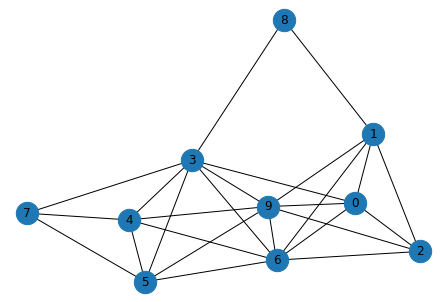

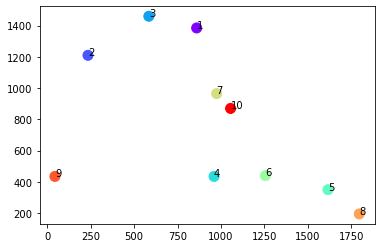

In [44]:
M = positionToAdjMatrix(x,y,r_det)

H = np.array(M).reshape(n,n)
L = Laplacienne(M)
print("\n adjacence \n", H)
#print("\n laplacienne \n", L)

P = pMatrix(H)
#print("P \n",P)

W = randStocastic(n)
#print(" Wk \n",W_k)


#matrice de communication
A = matriceCom(H,W)
#print("\n\n matrice de communication :\n", A)

show_graph_with_labels(H)


colors = cm.rainbow(np.linspace(0, 1, n))
plt.scatter(x[0:], y[0:], c=colors, s=100)
    
for i in range(1,n+1):
    plt.annotate(i, (x[i-1], y[i-1]))

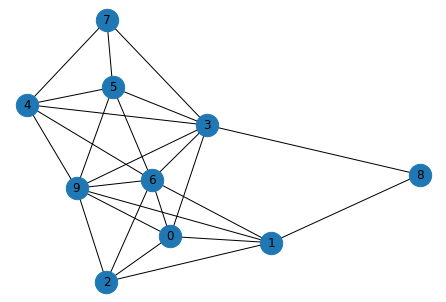

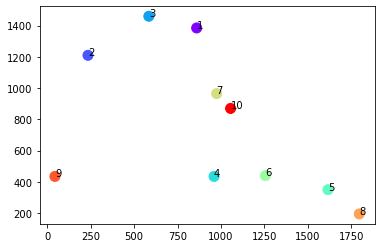

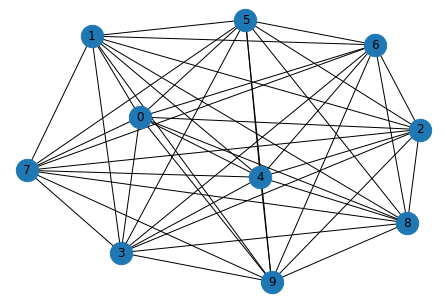

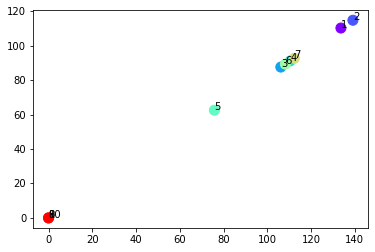

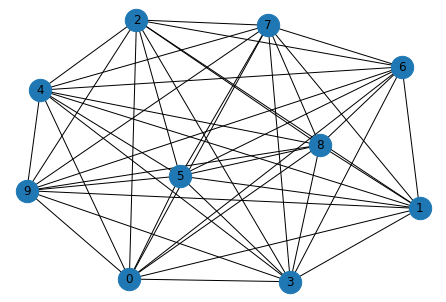

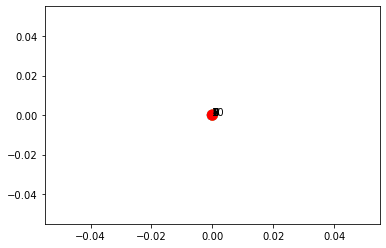

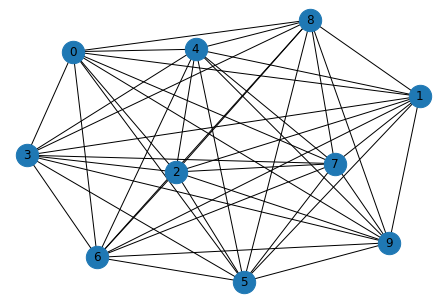

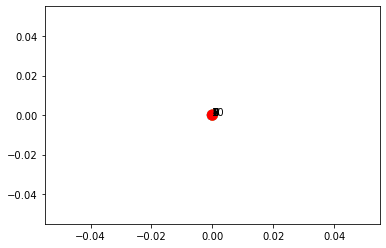

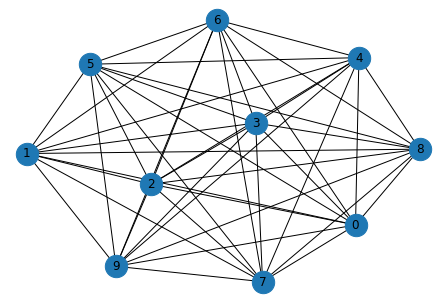

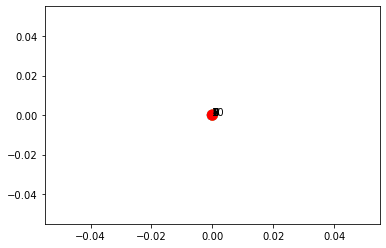

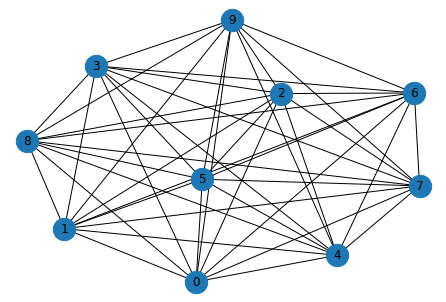

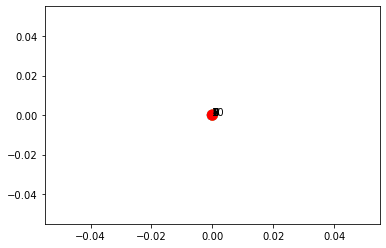

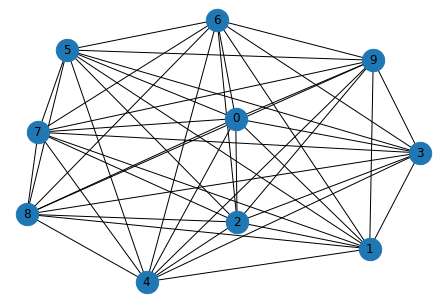

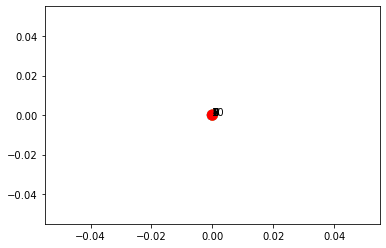

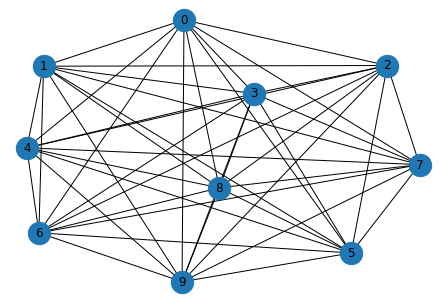

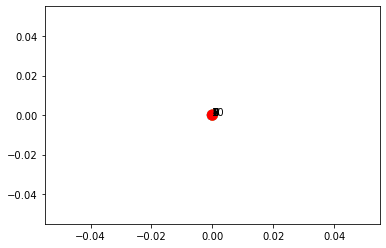

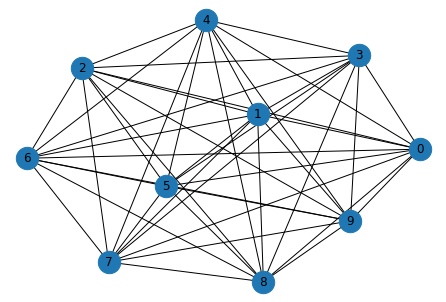

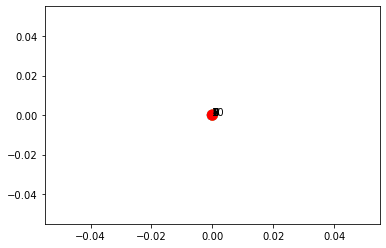

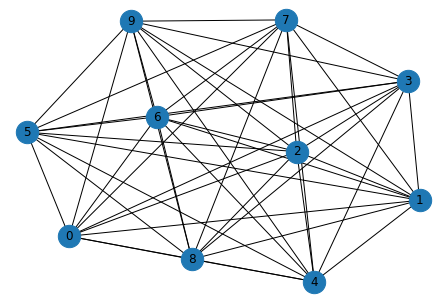

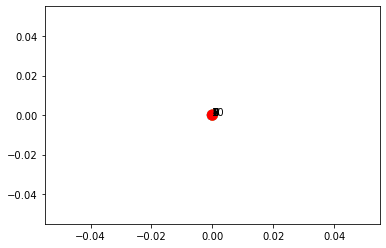

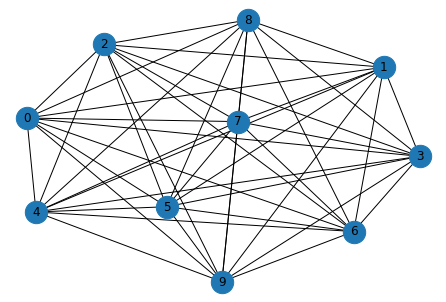

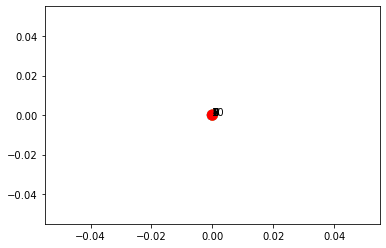

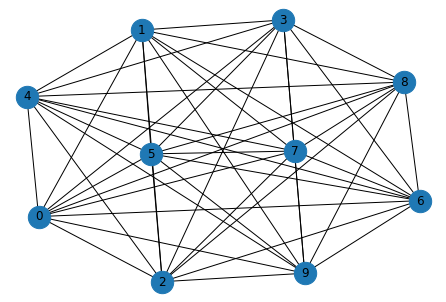

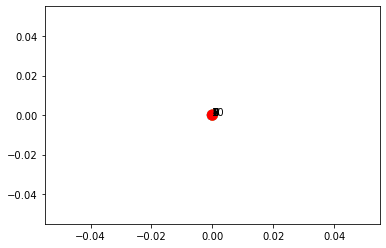

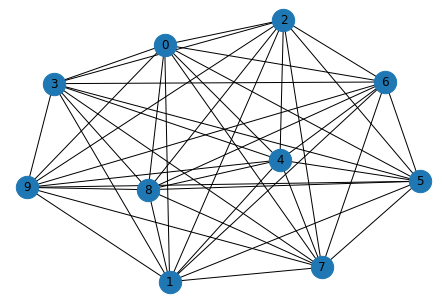

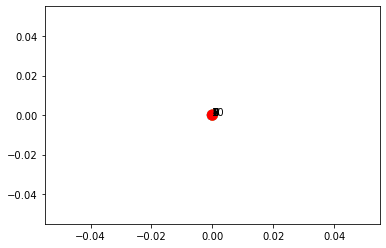

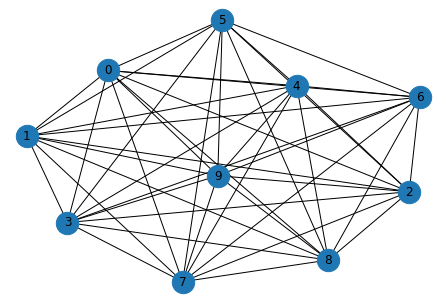

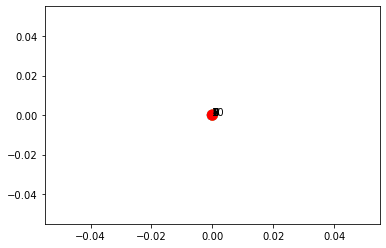

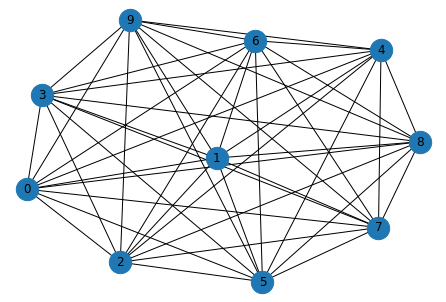

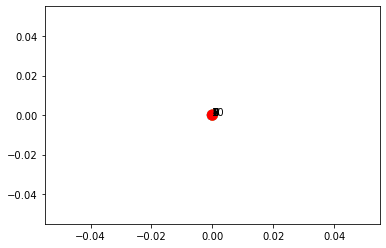

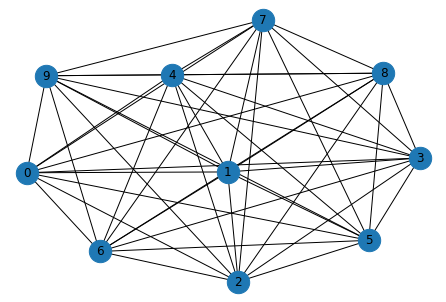

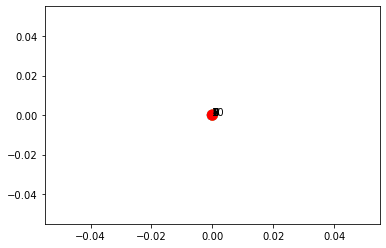

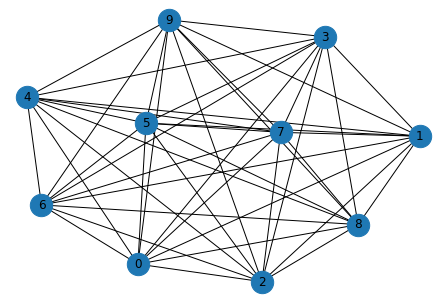

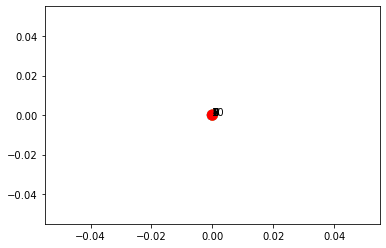

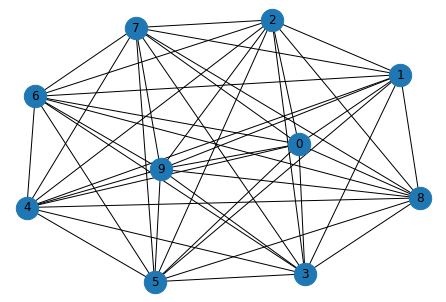

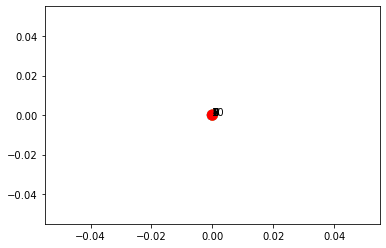

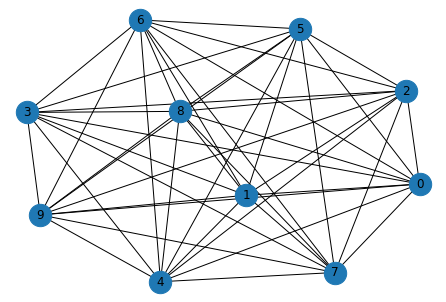

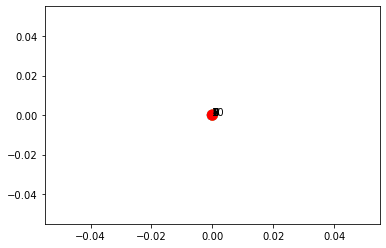

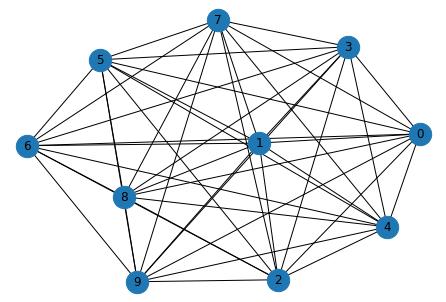

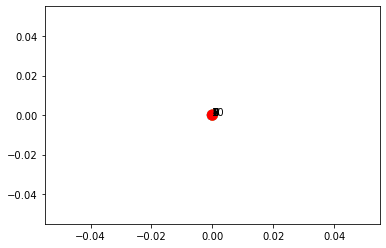

In [45]:
camera = Camera(plt.figure())

#main

for _ in range(k):
    
    M = positionToAdjMatrix(x,y,r_det)
    H = np.array(M).reshape(n,n)
    P = pMatrix(H)
    W = np.dot(P,W)
    A = matriceCom(H,W)
    
    show_graph_with_labels(np.array(M))
    
    plt.scatter(x[0:], y[0:], c=colors, s=100)
    
    for i in range(1,n+1):
        plt.annotate(i, (x[i-1], y[i-1]))
        
    x,y = mouvement(x,y,A)
    
    plt.pause(1.1)
    camera.snap()

anim = camera.animate(blit=True)
anim.save('rdv1.mp4')



In [46]:
with open("initialCondition.pkl",'rb') as f :
    x,y = pickle.load(f)
